<a href="https://colab.research.google.com/github/RodriMec/DataScience/blob/main/Auto_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
!pip install pmdarima
from pmdarima.arima import auto_arima

In [ ]:
import pandas as pd

# Carregar a base de dados, corrigindo o formato da data
data = pd.read_csv('/content/Arquivos Data Science.csv', sep=';', parse_dates=['DATE'], index_col='DATE')

# Garantir que a coluna 'DATE' seja convertida corretamente para o formato mês-ano (m-aaaa)
data.index = pd.to_datetime(data.index, format='%m-%Y')

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
print(data.head())


           Taxa Real Efetiva Reservas Internacionais  IPCA Taxa Selic  \
DATE                                                                    
2001-01-01            100,36                35598,00  0,57       0,05   
2001-04-01            114,17                34653,00  0,58       0,05   
2001-07-01            124,71                35552,00  1,33       0,06   
2001-10-01            137,79                37492,00  0,83       0,06   
2002-01-01            111,75                36167,00  0,52       0,06   

             PIB EUA  
DATE                  
2001-01-01  10470,23  
2001-04-01  10599,00  
2001-07-01  10598,02  
2001-10-01  10660,47  
2002-01-01  10783,50  


<ipython-input-8-535c31f03ff7>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/Arquivos Data Science.csv', sep=';', parse_dates=['DATE'], index_col='DATE')


In [ ]:
import pandas as pd

# Carregar a base de dados, garantindo que os números e datas sejam tratados corretamente
data = pd.read_csv('/content/Arquivos Data Science.csv', sep=';', parse_dates=['DATE'], index_col='DATE')

# Substituir as vírgulas por pontos nas colunas numéricas
data = data.replace({',': '.'}, regex=True)

# Converter as colunas para tipo numérico
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Garantir que a coluna 'DATE' seja convertida corretamente para o formato mês-ano (m-aaaa)
data.index = pd.to_datetime(data.index, format='%m-%Y')

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
print(data.head())


            Taxa Real Efetiva  Reservas Internacionais  IPCA  Taxa Selic  \
DATE                                                                       
2001-01-01             100.36                  35598.0  0.57        0.05   
2001-04-01             114.17                  34653.0  0.58        0.05   
2001-07-01             124.71                  35552.0  1.33        0.06   
2001-10-01             137.79                  37492.0  0.83        0.06   
2002-01-01             111.75                  36167.0  0.52        0.06   

             PIB EUA  
DATE                  
2001-01-01  10470.23  
2001-04-01  10599.00  
2001-07-01  10598.02  
2001-10-01  10660.47  
2002-01-01  10783.50  


<ipython-input-9-8e06ac6ea216>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/Arquivos Data Science.csv', sep=';', parse_dates=['DATE'], index_col='DATE')


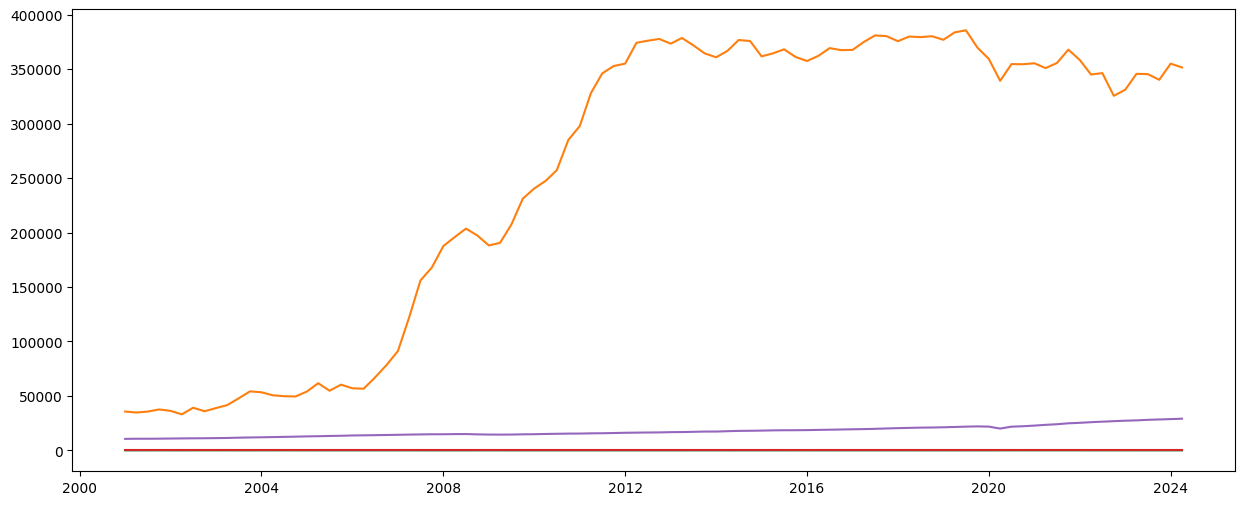

In [ ]:
#Visualizar o dado
plt.plot(data)

In [ ]:
from pmdarima import auto_arima

# Iterar sobre as colunas numéricas do DataFrame (excluindo a coluna de data)
for column in data.columns:
    # Selecione a série temporal para a coluna
    ts = data[column]

    # Verificar e tratar valores NaN (preenchendo com a média ou removendo)
    if ts.isnull().any():
        # Opção 1: Preencher com a média
        ts = ts.fillna(ts.mean())
        # Opção 2: Ou, você pode optar por remover as linhas com NaN
        # ts = ts.dropna()

    # Ajuste do modelo ARIMA
    stepwise_model = auto_arima(ts, start_p=1, start_q=1, start_d=0, start_P=0,
                                 max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

    # Exibir o AIC do modelo para cada coluna
    print(f"Modelo para a coluna {column}: AIC = {stepwise_model.aic()}")


 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=694.769, Time=0.59 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=696.369, Time=0.78 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=697.683, Time=0.60 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=696.291, Time=0.18 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=699.521, Time=0.46 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=697.860, Time=0.21 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=699.669, Time=0.31 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=696.250, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=697.864, Time=0.15 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=699.128, Time=0.42 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=697.786, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=700.907, Time=0.52 sec
 ARIMA(0,1,1)(2,0,0)[1